<a href="https://colab.research.google.com/github/HenriqueCCdA/BC_DS_Projeto_Final/blob/main/Notebooks/ML/treinamentos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# 1) Resumo

Neste notebook foram feitos os treinamentos e seleção de hyperparamentros de 6 modelos de **ML** distintos. Os modelos estudados foram:

* DummyClassifier
* LogisticRegression
* DecisionTreeClassifier
* Forest Tree
* Support Vector Machine
* KNeighbors

A busca pelos hyperparametros foram feitas pelo GridSearchCV ou pelo RandomizedSearchCV. Para a Cross Validation foi usado **RepeatedStratifiedKFold** com **5** divições de **10** repetições.

O parametro utilizado para avaliação do modelo foi **ROC_AUC** e quantidade de **falsos negativos** (FN).

A base de dados utilizados tem **351** amostras com **52** variaveis explicativas. Dessas **351** amostras **298** foram usados para **Cross Validation** (treino + teste) e **53** foram usados para a **validação**.


---
# 2) Pre-analise

---
## 2.1) Minhas Funções

In [97]:
# Maquina Local 
if (True):
    import sys
    sys.path.insert(1, "../../")

    from src.plota_graficos import plota_curva_roc, plota_matriz_de_confusao
    from src.ml import retorna_x_y, intervalo_de_confianca, treina_modelo_grid_search_cv, treina,\
                        treina_modelo_randomized_search_cv, obtem_os_resultados_SearchCV, cv_val_split, desempenho_dos_modelos 

    from src.info import proporcao_y, numero_teste_treino_val, resultados_treinamento, dimensao_dados, variaveis_explicativas

# Collab
else:
   !curl -O "https://raw.githubusercontent.com/HenriqueCCdA/BC_DS_Projeto_Final/main/requirements.txt"
   !pip3 install -r requirements.txt
   !curl -O "https://raw.githubusercontent.com/HenriqueCCdA/BC_DS_Projeto_Final/main/src/plota_graficos.py"
   !curl -O "https://raw.githubusercontent.com/HenriqueCCdA/BC_DS_Projeto_Final/main/src/ml.py"
   !curl -O "https://raw.githubusercontent.com/HenriqueCCdA/BC_DS_Projeto_Final/main/src/info.py"

   from plota_graficos import plota_curva_roc, plota_matriz_de_confusao
   from ml import retorna_x_y, intervalo_de_confianca, treina_modelo_grid_search_cv, treina, \
                  treina_modelo_randomized_search_cv, obtem_os_resultados_SearchCV, cv_val_split, desempenho_dos_modelos

   from info import proporcao_y, numero_teste_treino_val, resultados_treinamento, dimensao_dados, variaveis_explicativas

---
## 2.2) Importando libs

In [98]:
import pandas as pd
#
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
#
import matplotlib.pyplot as plt
#
import numpy as np
#
from scipy.stats import uniform
#
from numpy.random import MT19937
from numpy.random import RandomState, SeedSequence
#


## 2.3) Versão dos bibilotecas

In [99]:
import sklearn as sk
import scipy   as sc
import matplotlib as mpl

print(f'scipy      : {sc.__version__}')
print(f'sklearn    : {sk.__version__}')
print(f'pandas     : {pd.__version__}')
print(f'numpy      : {np.__version__}')
print(f'matplotlib : {mpl.__version__}')

scipy      : 1.6.2
sklearn    : 0.24.2
pandas     : 1.2.4
numpy      : 1.20.2
matplotlib : 3.3.4


---
# 3) Lendo os dados

In [100]:
seed     = 1471523

In [101]:
path = "https://raw.githubusercontent.com/HenriqueCCdA/BC_DS_Projeto_Final/main/Dados/Tratados/dados_sem_coor_acima_do_valor_de_corte.csv"
path = "../../Dados/Tratados/dados_sem_corr_acima_do_valor_de_corte.csv"
dados = pd.read_csv(path)

dimensao_dados(dados)

dados.tail(n=5)

Numero de linhas : 351 
Numero de colunas: 42 


,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,...,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,ICU
346,0,-0.333333,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.457627,0.142857,0.736842,-0.418803,-1.0,-1.0,-1.0,-1.0,-1.000000,1
347,1,1.000000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.457627,-0.059524,0.526316,-0.589744,-1.0,-1.0,-1.0,-1.0,-0.619048,0
348,0,-0.111111,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.457627,-0.071429,0.894737,-0.299145,-1.0,-1.0,-1.0,-1.0,-1.000000,1
349,0,-0.333333,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.661017,-0.107143,0.736842,-0.247863,-1.0,-1.0,-1.0,-1.0,-1.000000,0
350,0,-0.111111,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.525424,0.535714,0.789474,-0.299145,-1.0,-1.0,-1.0,-1.0,-1.000000,0


In [102]:
dados.describe()

,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,...,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,ICU
count,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,...,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000
mean,0.458689,-0.046534,0.381766,0.108262,0.022792,0.091168,0.019943,0.128205,0.045584,0.196581,...,-0.468207,0.097772,0.760029,-0.313074,-0.948718,-0.949522,-0.955764,-0.949053,-0.953398,0.461538
std,0.499002,0.640366,0.486513,0.311155,0.149453,0.288259,0.140004,0.334795,0.208879,0.397980,...,0.213326,0.272230,0.116880,0.185592,0.140561,0.144820,0.138641,0.162552,0.120752,0.499230
min,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.954802,-0.571429,0.263158,-0.760684,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,0.000000,-0.555556,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.593220,-0.107143,0.684211,-0.418803,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
50%,0.000000,-0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.525424,0.071429,0.789474,-0.299145,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
75%,1.000000,0.555556,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.389831,0.250000,0.842105,-0.213675,-1.000000,-0.987730,-0.984733,-1.000000,-0.976190,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.830508,0.964286,1.000000,0.487179,0.200000,0.411043,0.511450,0.529412,-0.071429,1.000000


In [103]:
dados.std()

AGE_ABOVE65                     0.499002
AGE_PERCENTIL                   0.640366
GENDER                          0.486513
DISEASE GROUPING 1              0.311155
DISEASE GROUPING 2              0.149453
DISEASE GROUPING 3              0.288259
DISEASE GROUPING 4              0.140004
DISEASE GROUPING 5              0.334795
DISEASE GROUPING 6              0.208879
HTN                             0.397980
IMMUNOCOMPROMISED               0.369338
OTHER                           0.391297
ALBUMIN_MEDIAN                  0.146607
BE_VENOUS_MEDIAN                0.128238
BLAST_MEDIAN                    0.107614
FFA_MEDIAN                      0.165901
GGT_MEDIAN                      0.147390
HEMATOCRITE_MEDIAN              0.226253
LACTATE_MEDIAN                  0.837465
LEUKOCYTES_MEDIAN               0.158005
LINFOCITOS_MEDIAN               0.153140
P02_VENOUS_MEDIAN               0.128432
PCR_MEDIAN                      0.241212
PLATELETS_MEDIAN                0.209888
POTASSIUM_MEDIAN

In [104]:
_ = variaveis_explicativas(dados)

 col[  0] -> AGE_ABOVE65                    col[  1] -> AGE_PERCENTIL                  
 col[  2] -> GENDER                         col[  3] -> DISEASE GROUPING 1             
 col[  4] -> DISEASE GROUPING 2             col[  5] -> DISEASE GROUPING 3             
 col[  6] -> DISEASE GROUPING 4             col[  7] -> DISEASE GROUPING 5             
 col[  8] -> DISEASE GROUPING 6             col[  9] -> HTN                            
 col[ 10] -> IMMUNOCOMPROMISED              col[ 11] -> OTHER                          
 col[ 12] -> ALBUMIN_MEDIAN                 col[ 13] -> BE_VENOUS_MEDIAN               
 col[ 14] -> BLAST_MEDIAN                   col[ 15] -> FFA_MEDIAN                     
 col[ 16] -> GGT_MEDIAN                     col[ 17] -> HEMATOCRITE_MEDIAN             
 col[ 18] -> LACTATE_MEDIAN                 col[ 19] -> LEUKOCYTES_MEDIAN              
 col[ 20] -> LINFOCITOS_MEDIAN              col[ 21] -> P02_VENOUS_MEDIAN              
 col[ 22] -> PCR_MEDIAN         

### Divindido os dados em validação e Cross Valadiation (teste+treino)

In [105]:
rng = RandomState(MT19937(SeedSequence(seed)))
x_cv, x_val, y_cv, y_val = cv_val_split(dados, p_val = .10, rng=rng)

### Verificando se a proporção foi mantida 

In [106]:
proporcao_y(dados['ICU'])
proporcao_y(y_val)
proporcao_y(y_cv )

Proporcao do ICU
Campo 0 ->  53.85%
Campo 1 ->  46.15%
Proporcao do ICU
Campo 0 ->  52.78%
Campo 1 ->  47.22%
Proporcao do ICU
Campo 0 ->  53.97%
Campo 1 ->  46.03%


In [107]:
numero_teste_treino_val(dados['ICU'], y_val, y_cv)

Número total de entradas                         : 351
Número total de entradas para validacao          : 36
Número total de entradas para o Cross Validation : 315


# 4) Modelo de ML

A opção **refit** foi deixado como **true** logo depois que o melhor modelo for selecioando o RandomizedSearchCV/GridSearchCv **re-treina** esse modelo com o dataset completo (treino+teste). 

In [108]:
n_iter   = 25
n_splits = 5
n_repeats= 10
seed     = 14715

## 4.1) DummyClassifier

> Aqui será treinado do modelo **DummyClassifier**. Para o treino foi usado **GridSearchCV**. O único hyperparametro disponivel foi **strategy**. O intervalor de busca  **[stratified, 'ost_frequent, prior, 'uniform]**. O DummyClassifier será usado como o nosso modelo **"baseline"**



In [109]:
rng = RandomState(MT19937(SeedSequence(seed)))

modelo = DummyClassifier(random_state=rng)

parameters = {'strategy' : ['stratified', 'most_frequent', 'prior', 'uniform']}

resultados, melhor_modelo_dummy, melhores_hyperparametros  = treina_modelo_grid_search_cv(modelo,
                                                                                      x_cv,
                                                                                      y_cv,
                                                                                      parameters,
                                                                                      n_splits=n_splits,
                                                                                      n_repeats=n_repeats,
                                                                                      rng=rng)

resultados_treinamento(resultados, melhor_modelo_dummy, melhores_hyperparametros)

Fitting 50 folds for each of 4 candidates, totalling 200 fits
melhores hyperparametros : {'strategy': 'stratified'}
Melhor modelo            : DummyClassifier(random_state=RandomState(MT19937) at 0x13C29EEA140,
                strategy='stratified')


,paramentros,media_teste,media_treino,std_teste,std_treino,mean_fit_time,std_fit_time,mean_score_time,std_score_time,rank_test_score
0,{'strategy': 'stratified'},0.515659,0.49555,0.074393,0.027633,0.001759,0.000650,0.002358,0.000592,1
1,{'strategy': 'most_frequent'},0.500000,0.50000,0.000000,0.000000,0.001739,0.000657,0.002858,0.004776,2
2,{'strategy': 'prior'},0.500000,0.50000,0.000000,0.000000,0.001839,0.001171,0.002618,0.001610,2
3,{'strategy': 'uniform'},0.500000,0.50000,0.000000,0.000000,0.001599,0.000599,0.002198,0.000490,2


---
## 4.2) Regreção logistica

> Aqui será treinado do modelo **LogisticRegression**. No treino foi usado **RandomizedSearchCV** com **50** iterações. Os hyperparametros foram:
>* C             : [0, 4]


In [ ]:
rng = RandomState(MT19937(SeedSequence(seed)))

parameters = {'C': uniform(loc=0, scale=4)}
modelo = LogisticRegression(max_iter=1000, tol=1e-6)

melhor_modelo_lr, res = treina(modelo = modelo,
                        x = x_cv, 
                        y = y_cv, 
                        parameters = parameters, 
                        n_splits = n_splits, 
                        n_repeats = n_repeats, 
                        n_iter = n_iter, 
                        titulo = 'Seleção de Hyperparametros - LogisticRegression',
                        n = 10,
                        rng=rng)

res

Fitting 50 folds for each of 25 candidates, totalling 1250 fits


---
## 4.3) Arvore de decissão

> Aqui será treinado do modelo **DecisionTreeClassifier**. No treino foi usado **RandomizedSearchCV** com **50** iterações. Os hyperparametros foram:
>* max_depth       : [1-20]
>* criterion       : [gini, entropy]
>* min_samples_leaf: [1-5]
>* max_leaf_nodes  : [2-5]


In [ ]:
rng = RandomState(MT19937(SeedSequence(seed)))

parameters = {'max_depth'       : np.arange(1, 21),
              'criterion'       : ['gini', 'entropy'],
              'min_samples_leaf': np.arange(1, 6),
              'max_leaf_nodes'  : np.arange(2, 6)
             }
modelo = DecisionTreeClassifier()

melhor_modelo_arvore, res = treina(modelo = modelo,
                            x = x_cv, 
                            y = y_cv, 
                            parameters = parameters, 
                            n_splits = n_splits, 
                            n_repeats = n_repeats, 
                            n_iter = n_iter, 
                            titulo = 'Seleção de Hyperparametros - DecisionTree',
                            n = 10,
                            rng=rng)

res

---
## 4.4) Forest Tree

> Aqui será treinado do modelo **Forest Tree**. No treino foi usado **RandomizedSearchCV** com **10** iterações. Os hyperparametros foram:
>* n_estimators    : [10, 50, 100, 150, 200]
>* max_depth       : [1, 20]    
>* criterion       : [gini, entropy]
>* min_samples_leaf: [1-5]
>* max_leaf_nodes  : [2-5]


In [ ]:
rng = RandomState(MT19937(SeedSequence(seed)))

parameters = {'n_estimators'    : [10, 50, 100, 150, 200, 250, 300],
              'max_depth'       : np.arange(1, 21),
              'criterion'       : ['gini', 'entropy'],
              'min_samples_leaf': np.arange(1, 6),
              'max_leaf_nodes'  : np.arange(2, 6)
             }
modelo = RandomForestClassifier(random_state=rng)

melhor_modelo_forest, res = treina(modelo = modelo,
                              x = x_cv, 
                              y = y_cv, 
                              parameters = parameters, 
                              n_splits = n_splits, 
                              n_repeats = n_repeats, 
                              n_iter = n_iter, 
                              titulo = 'Seleção de Hyperparametros - RandomForest',
                              n = 10,
                              rng=rng)

res

> 

## 4.5) Support Vector Classification.

> Aqui será treinado do modelo **SVC**. No treino foi usado **RandomizedSearchCV** com **50** iterações. Os hyperparametros de busca foram
>* kernel        : [linear, poly, rbf, sigmoid]
>* C             : [0, 2]
>* gamma         : [scale, auto]
>* shrinking     : [True , False]

In [ ]:
rng = RandomState(MT19937(SeedSequence(seed)))

parameters = {'kernel'          : ['linear', 'poly', 'rbf', 'sigmoid'],
              'C'               : uniform(loc=0, scale=2),
              'gamma'           : ['scale', 'auto'],
              'shrinking'       : [True, False]
             }

modelo = SVC(probability=True)

melhor_modelo_svc, res = treina(modelo = modelo,
                              x = x_cv, 
                              y = y_cv, 
                              parameters = parameters, 
                              n_splits = n_splits, 
                              n_repeats = n_repeats, 
                              n_iter = n_iter, 
                              titulo = 'Seleção de Hyperparametros - SVC',
                              n = 10,
                              rng=rng)

res

## 4.5) KNeighbors

> Aqui será treinado do modelo **KNeighbor**. No treino foi usado **RandomizedSearchCV** com **50** iterações. Os hyperparametros de busca foram
>* n_neighbors   : [1, 10]
>* p             : [1, 2]
>* weights       : [uniform, distance]
>* algorithm     : [auto, ball_tree, kd_tree, brute]

In [ ]:
rng = RandomState(MT19937(SeedSequence(seed)))

parameters = {'n_neighbors'     : np.arange(1, 11),
              'p'               : [1, 2],
              'weights'         : ['uniform', 'distance'],
              'algorithm'       : ['auto', 'ball_tree', 'kd_tree', 'brute']
             }

modelo = KNeighborsClassifier()

melhor_modelo_kn, res = treina(modelo = modelo,
                              x = x_cv, 
                              y = y_cv, 
                              parameters = parameters, 
                              n_splits = n_splits, 
                              n_repeats = n_repeats, 
                              n_iter = n_iter, 
                              titulo = 'Seleção de Hyperparametros - KNeighborsClassifier',
                              n = 10,
                              rng=rng)

res


# 5) Avaliando o melhor modelo

> Agora vamos avaliar o melhor modelo encontrado utilizando o dados de validação.

In [ ]:
modelos = [melhor_modelo_dummy, 
           melhor_modelo_lr, 
           melhor_modelo_arvore, 
           melhor_modelo_forest, 
           melhor_modelo_svc,
           melhor_modelo_kn] 

In [ ]:
desempenho_dos_modelos(modelos, x_val, y_val)

> DataFrame com os resultados

In [ ]:
plota_matriz_de_confusao(modelos, x_val, y_val)

> A Matriz de confusão dos modelos. Os paramentro mais crítico para o nosso modelo é o **falso negativo** (FN).

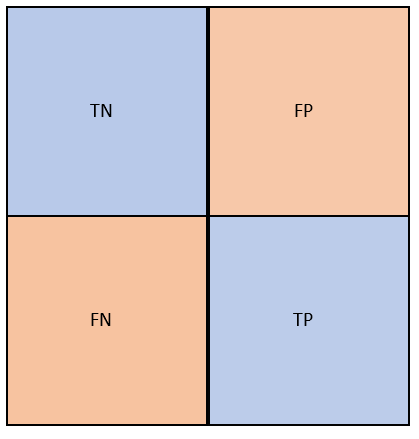

In [ ]:
plota_curva_roc(modelos, titulo='Curva ROC nos dados de Validação', x=x_val, y=y_val)

> A curva ROC dos modelos para os dados de validação. No gráfico observa-se que DummyClassifier estão na diagonal do gráfico como esperado

In [ ]:
plota_curva_roc(modelos, titulo='Curva ROC nos dados de Treino-Teste', x=x_cv, y=y_cv)

> A curva ROC dos modelos para os dados usados na **Cross Validation** (teste+treino). Este gráfico não pode ser usado para avaliar o modelo pois o modelo final foi re-treina com todos os dados da **Cross Validation** depois que o melhor hyperparametro foi achado.  

# 6) Conclusão